<a href="https://colab.research.google.com/github/LDTSon/Room-for-rent-Price-Prediction/blob/main/Geocode-address%20for%20K-NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [109]:
df = pd.read_csv('/content/Dataty2 - Root.csv')
df

,Price,Square,North,East,Parking,Drying Yard,AC,Water heater,Washing machine,TV,Fridge,Kitchen,Elevator,Bed
0,1200000,115.0,10.743698,106.681120,0,0,0,0,1,0,1,1,0,0
1,3300000,18.0,10.880590,106.589290,0,0,0,1,0,0,0,0,0,1
2,1200000,60.0,10.781684,106.665845,0,0,1,0,1,0,1,1,0,1
3,1200000,45.0,10.775467,106.663658,0,0,1,0,1,0,1,1,0,1
4,3500000,25.0,10.835250,106.766400,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7925,4000000,25.0,10.811670,106.683700,1,0,0,0,1,0,0,1,0,1
7926,6000000,35.0,10.836369,106.746744,1,0,0,0,0,0,0,1,0,0
7927,3200000,18.0,10.848905,106.656738,1,0,0,0,0,0,0,1,0,1
7928,4000000,18.0,10.875899,106.677082,1,0,1,1,0,0,1,1,1,1


In [110]:
df = df.drop_duplicates()

In [111]:
indexSquare = df[(df['Square'] >= 100) | (df['Square'] <= 10) | (df['Price'] >= 20000000) | (df['Price'] <= 800000) ].index
df.drop(indexSquare , inplace=True)
df

<ipython-input-111-9c610587f44e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(indexSquare , inplace=True)


,Price,Square,North,East,Parking,Drying Yard,AC,Water heater,Washing machine,TV,Fridge,Kitchen,Elevator,Bed
1,3300000,18.0,10.880590,106.589290,0,0,0,1,0,0,0,0,0,1
2,1200000,60.0,10.781684,106.665845,0,0,1,0,1,0,1,1,0,1
3,1200000,45.0,10.775467,106.663658,0,0,1,0,1,0,1,1,0,1
4,3500000,25.0,10.835250,106.766400,1,0,1,0,0,0,0,1,0,0
5,4600000,25.0,10.787953,106.643592,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7925,4000000,25.0,10.811670,106.683700,1,0,0,0,1,0,0,1,0,1
7926,6000000,35.0,10.836369,106.746744,1,0,0,0,0,0,0,1,0,0
7927,3200000,18.0,10.848905,106.656738,1,0,0,0,0,0,0,1,0,1
7928,4000000,18.0,10.875899,106.677082,1,0,1,1,0,0,1,1,1,1


import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Price'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Square'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['North'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, sort_ascending=False, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['East'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Price'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Square'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['North'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  figsize = (8 * figscale, 4 * figscale)
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['East'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.6):
  from matplotlib import pyplot as plt
  figsize = (len(colname_pairs) * 10 * figscale, 10 * figscale)
  plt.figure(figsize=figsize)
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    # Note: `32*figscale` may be too large; scaling by # of datapoints may be
    # wiser.
    ax.scatter(df[x_colname], df[y_colname], s=(32 * figscale), alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['Price', 'Square'], ['Square', 'North'], ['North', 'East'], ['East', 'Parking']]], **{})
chart

In [71]:
df['Price on Square'] = df['Price'] / df['Square']

<ipython-input-71-d6b2be94b194>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price on Square'] = df['Price'] / df['Square']


In [73]:
def remove_outlier_using_mstd(df):
  df_out = pd.DataFrame()
  m = np.mean(df['Price on Square'])
  st = np.std(df['Price on Square'])
  df_out = df[(df['Price on Square'] <= (m+st)) & (df['Price on Square'] > (m-st))]
  return df_out

df2 = remove_outlier_using_mstd(df)

In [74]:
def remove_outlier_using_IQR(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    Lower_fence = Q1 - (1.5*IQR)
    print(f"Lower fence is = {Lower_fence}")

    Higher_fence = Q3 + (1.5*IQR)
    print(f"Higher fence is = {Higher_fence}")

    IndexL_Outlier = data[data[column] < Lower_fence ].index
    IndexH_Outlier = data[data[column] > Higher_fence].index

    data.drop(IndexL_Outlier,inplace=True)
    data.drop(IndexH_Outlier,inplace=True)
    return data
df3 = remove_outlier_using_IQR(df2, 'Price')
df3 = remove_outlier_using_IQR(df3, 'Square')
df3

Lower fence is = 1200000.0
Higher fence is = 6000000.0
Lower fence is = 5.0
Higher fence is = 45.0


<ipython-input-74-39c2cb6c1beb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(IndexL_Outlier,inplace=True)
<ipython-input-74-39c2cb6c1beb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(IndexH_Outlier,inplace=True)
<ipython-input-74-39c2cb6c1beb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(IndexL_Outlier,inplace=True)
<ipython-input-74-39c2cb6c1beb>:16: SettingWithCopyWarning: 
A value is tryi

,Price,Square,North,East,Parking,Drying Yard,AC,Water heater,Washing machine,TV,Fridge,Kitchen,Elevator,Bed,Price on Square
1,3300000,18.0,10.880590,106.589290,0,0,0,1,0,0,0,0,0,1,183333.333333
4,3500000,25.0,10.835250,106.766400,1,0,1,0,0,0,0,1,0,0,140000.000000
5,4600000,25.0,10.787953,106.643592,1,0,0,0,1,0,0,0,1,0,184000.000000
6,3800000,22.0,10.870314,106.608116,1,0,1,0,1,0,1,1,0,0,172727.272727
7,1900000,20.0,10.817679,106.709145,0,1,1,0,1,0,1,1,1,1,95000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7924,3000000,27.0,10.814390,106.623790,1,0,1,0,0,0,0,1,1,1,111111.111111
7925,4000000,25.0,10.811670,106.683700,1,0,0,0,1,0,0,1,0,1,160000.000000
7926,6000000,35.0,10.836369,106.746744,1,0,0,0,0,0,0,1,0,0,171428.571429
7927,3200000,18.0,10.848905,106.656738,1,0,0,0,0,0,0,1,0,1,177777.777778


<Axes: >

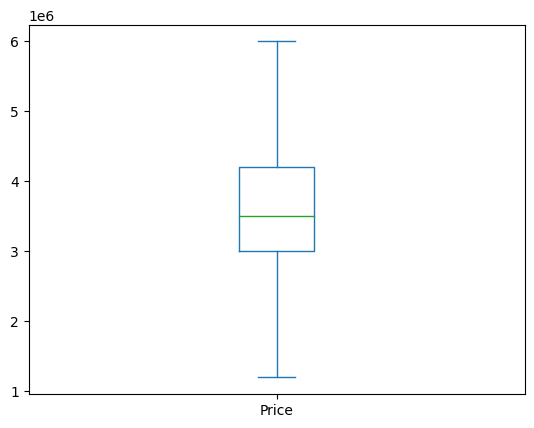

In [120]:
df3.Price.plot.box()

<Axes: >

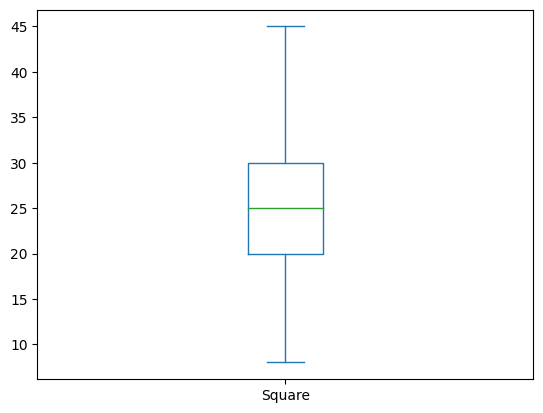

In [123]:
df3.Square.plot.box()

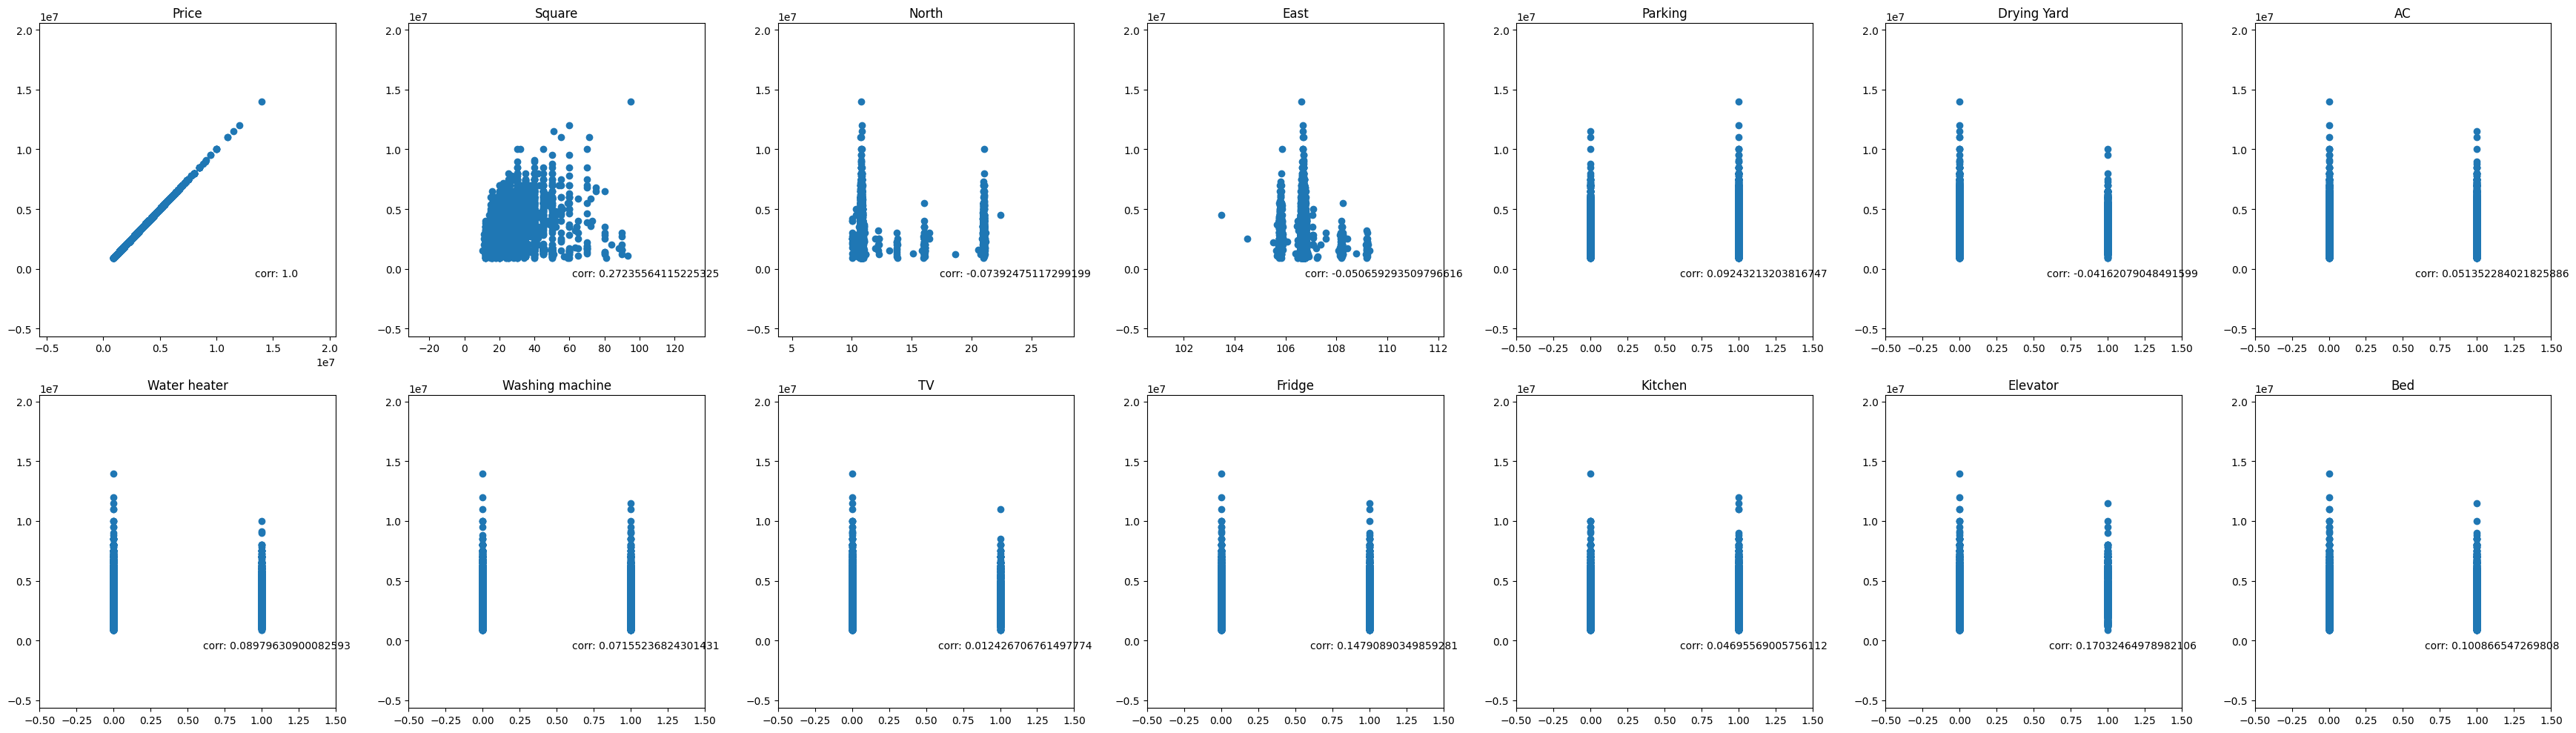

In [132]:
def scatterPlotToTarget(columns, target, ncolumns=7):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].scatter(x=df[columns[col_index]], y=df[target])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
      #correlation
      correlation = df[target].corr(df[columns[col_index]])
      axs[i,j].annotate(f'corr: {correlation}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center')
  fig.tight_layout()
numeric_columns = df.select_dtypes('number').columns
scatterPlotToTarget(numeric_columns, target = 'Price', ncolumns=7)

In [121]:
df3['LogPrice'] = np.log(df3['Price'])

In [122]:
df3['LogSquare'] = np.log(df3['Square'])

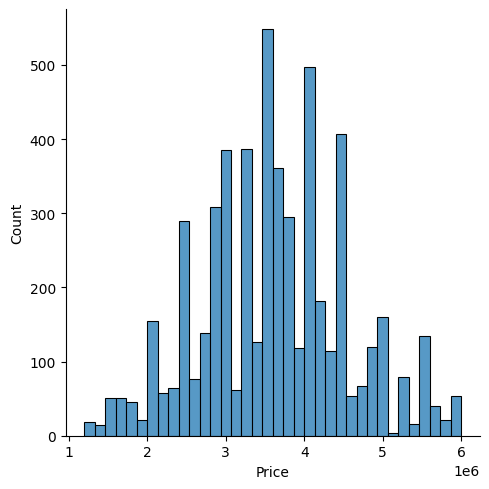

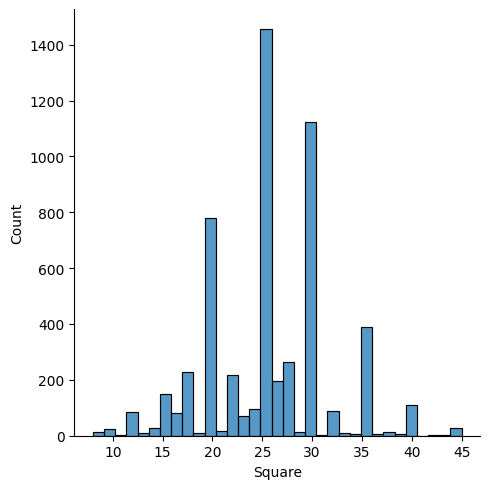

In [79]:
sns.displot(df3.Price)
sns.displot(df3.Square)

In [80]:
X = df3.drop( columns=['Price', 'Price on Square', 'LogPrice', 'LogSquare'])
X.head()

,Square,North,East,Parking,Drying Yard,AC,Water heater,Washing machine,TV,Fridge,Kitchen,Elevator,Bed
1,18.0,10.880590,106.589290,0,0,0,1,0,0,0,0,0,1
4,25.0,10.835250,106.766400,1,0,1,0,0,0,0,1,0,0
5,25.0,10.787953,106.643592,1,0,0,0,1,0,0,0,1,0
6,22.0,10.870314,106.608116,1,0,1,0,1,0,1,1,0,0
7,20.0,10.817679,106.709145,0,1,1,0,1,0,1,1,1,1


In [81]:
Y = df3.Price
Y.head()

1    3300000
4    3500000
5    4600000
6    3800000
7    1900000
Name: Price, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [83]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train)
lr_clf.score(X_test, Y_test)

0.5575196701293943

In [84]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=6, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, Y, cv = cv)

array([0.53173719, 0.52647916, 0.55299646, 0.53314619, 0.55848415,
       0.57805339])

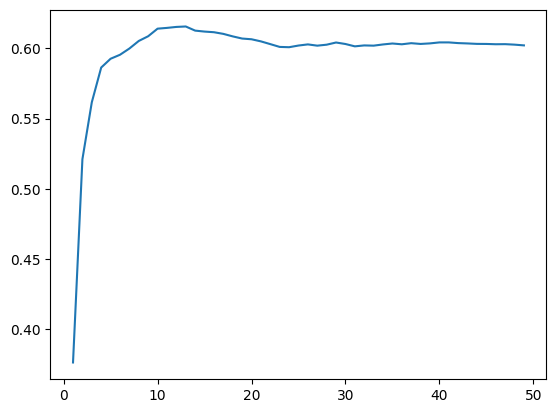

In [115]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
x = []
y = []
for k in range(1, 50):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, Y_train)
    x.append(k)
    y.append(knn_regressor.score(X_test, Y_test))
    Y_pred = knn_regressor.predict(X_test)
    # print(f'Score for k={k}: {knn_regressor.score(X_test, Y_test)}')
    # print('MAE: ', mean_absolute_error(Y_test, Y_pred))
    # print('RMSE: ', np.sqrt(mean_squared_error(Y_test, Y_pred)))
# plt.plot(x, y)
# plt.xlabel('k')
# plt.ylabel('R2 Score')
# plt.show()
pl = plt.plot(x, y)
pl

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_with_gridSearchCV(x, y):
  algos = {
      'lasso': {
          'model' : Lasso(),
          'params' : {
              'alpha': [2000, 1900, 1800, 1700, 1600, 1500, 1400, 1300, 1200, 1100, 1000],
          }
      },
      'ridge': {
          'model' : Ridge(),
          'params' : {
              'alpha': [55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
          }
      },
        'random forest': {
            'model' : RandomForestRegressor(),
            'params' : {
                'n_estimators': [60, 70, 80, 90, 100, 110, 120, 130],
            }
        },
  }

  score = []
  cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state = 0)
  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X, Y)
    score.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })
  return pd.DataFrame(score, columns = ['model', 'best_score', 'best_params'])
find_best_model_with_gridSearchCV(X, Y)

,model,best_score,best_params
0,random forest,0.626907,{'n_estimators': 110}


In [117]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


models = {
    'linear_regression': LinearRegression(),
    'ridge_regression': Ridge(75),
    'lasso_regression': Lasso(1400),
    'mlp_model2': MLPRegressor((110, 110)),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(110)
}

for (model_name, model) in models.items():
  model.fit(X_train, Y_train)
  y_pred = model.predict(X_test)
  print(model_name)
  # plt.scatter(y_pred, Y_test)
  # plt.xlabel('Predict Value')
  # plt.ylabel('Actual Value')
  # plt.show()
  print('MAE: ', mean_absolute_error(Y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(Y_test, y_pred)))
  print('r2 score: ', r2_score(Y_test, y_pred))
  print()


linear_regression
MAE:  518092.05916164257
RMSE:  641800.9424072001
r2 score:  0.5575196701293943

ridge_regression
MAE:  518753.21892858477
RMSE:  641290.0528139604
r2 score:  0.5582238405556643

lasso_regression
MAE:  518519.8592818355
RMSE:  641286.9894501815
r2 score:  0.5582280611664376



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


mlp_model2
MAE:  643605.8205646717
RMSE:  809322.5725602566
r2 score:  0.29638259316813

decision_tree
MAE:  544449.472096531
RMSE:  726248.6862975513
r2 score:  0.4334164151607156

random_forest
MAE:  436695.6621809563
RMSE:  558151.9988913189
r2 score:  0.6653442918264272

